In [ ]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



In [23]:
# Chargement du jeu de données

from sklearn.datasets import fetch_california_housing
import pandas as pd

# Chargement
data = fetch_california_housing()

# Création d’un DataFrame avec les features
df = pd.DataFrame(data.data, columns=data.feature_names)

# Ajout de la cible (prix médian des maisons)
df['MedHouseVal'] = data.target

# Aperçu
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
# Nettoyage et Prétraitement

# Vérification des informations générales
df.info()

# Statistiques descriptives
df.describe()

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Vérification des types de données
print("\nTypes de données :\n", df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Valeurs manquantes par colonne :
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Types de données :
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitud

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

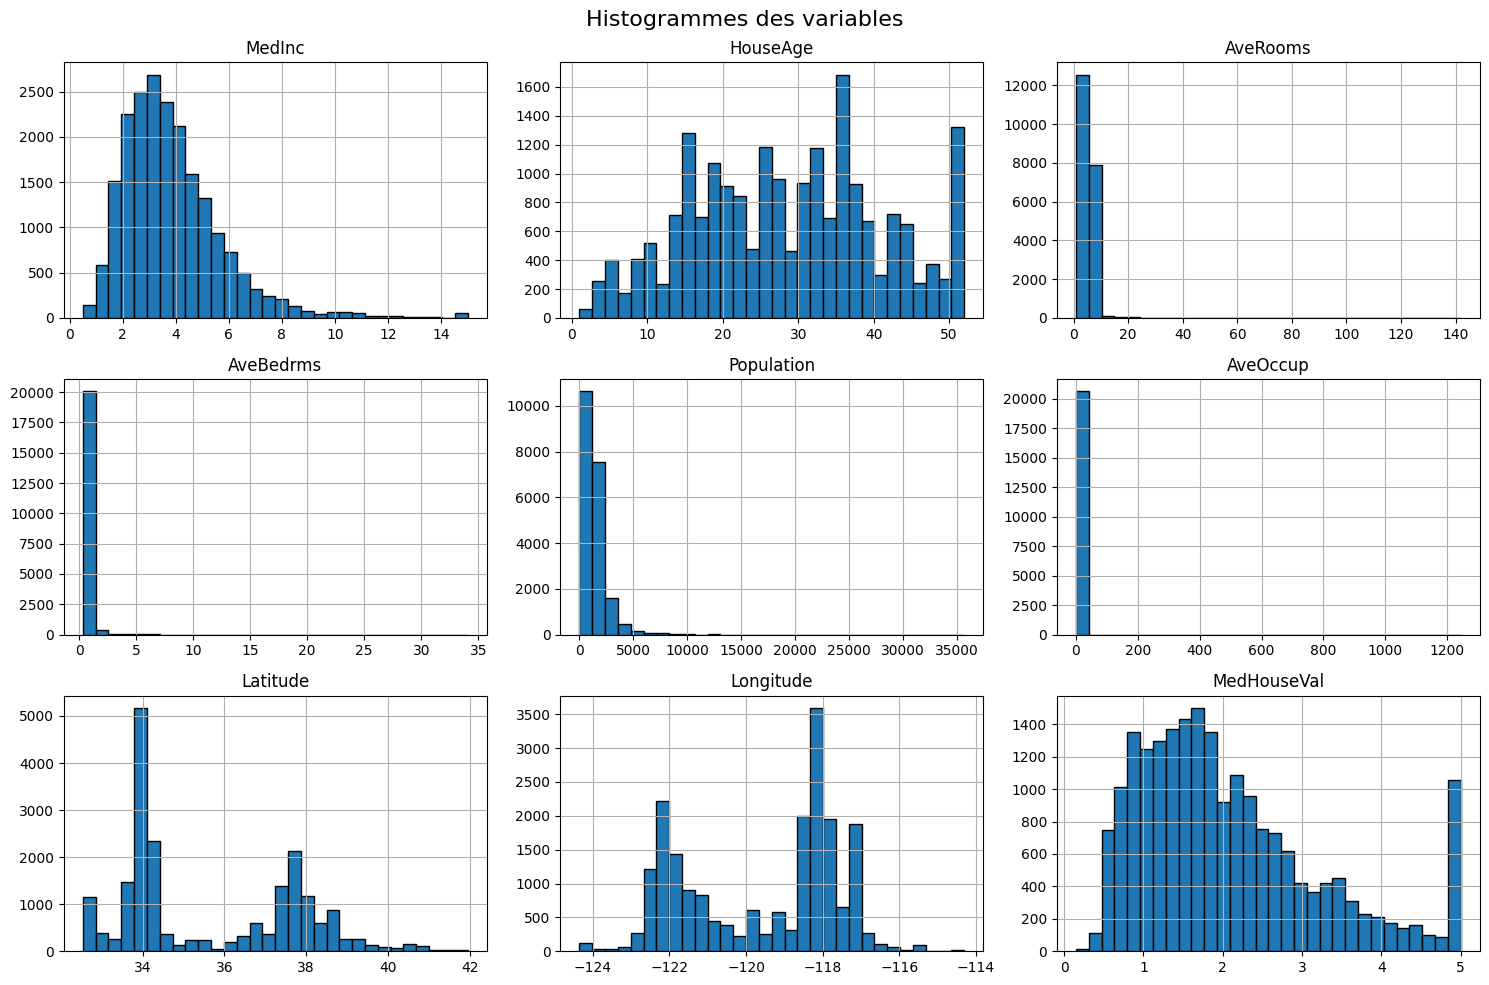

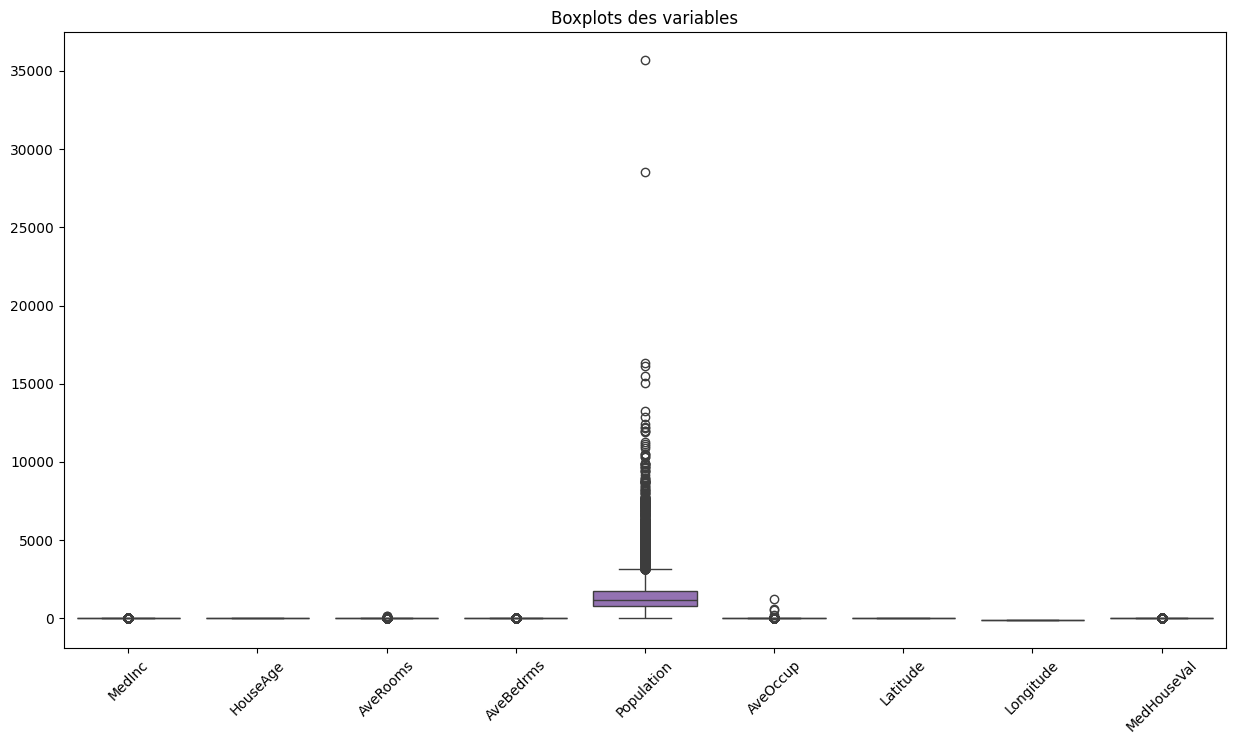

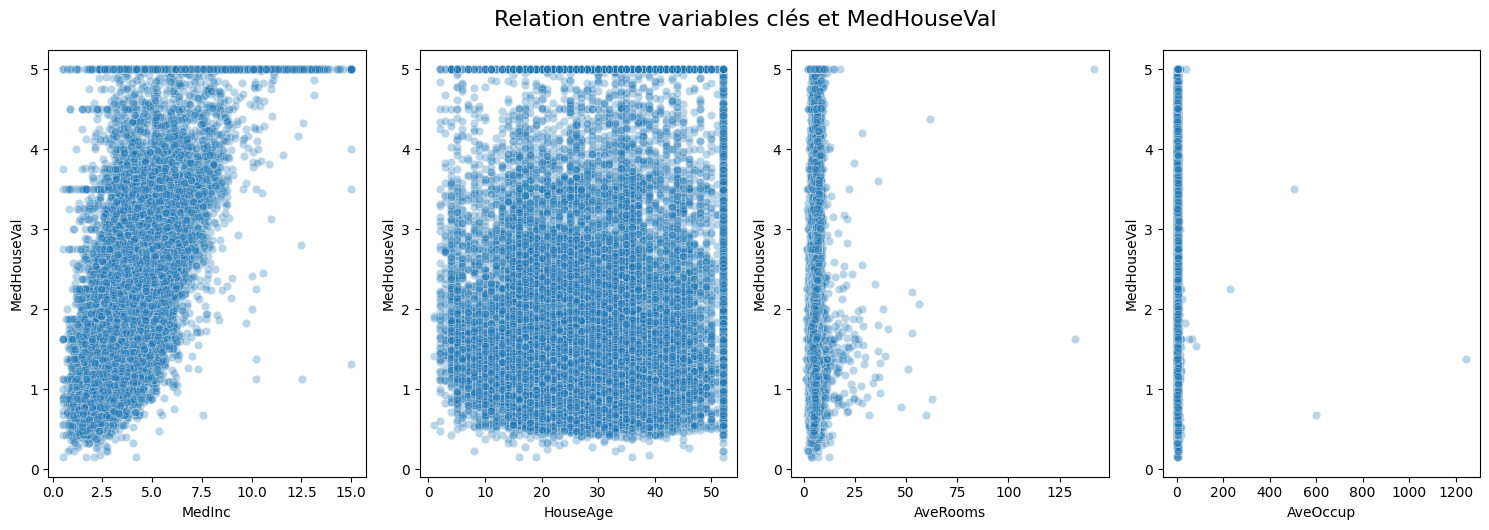

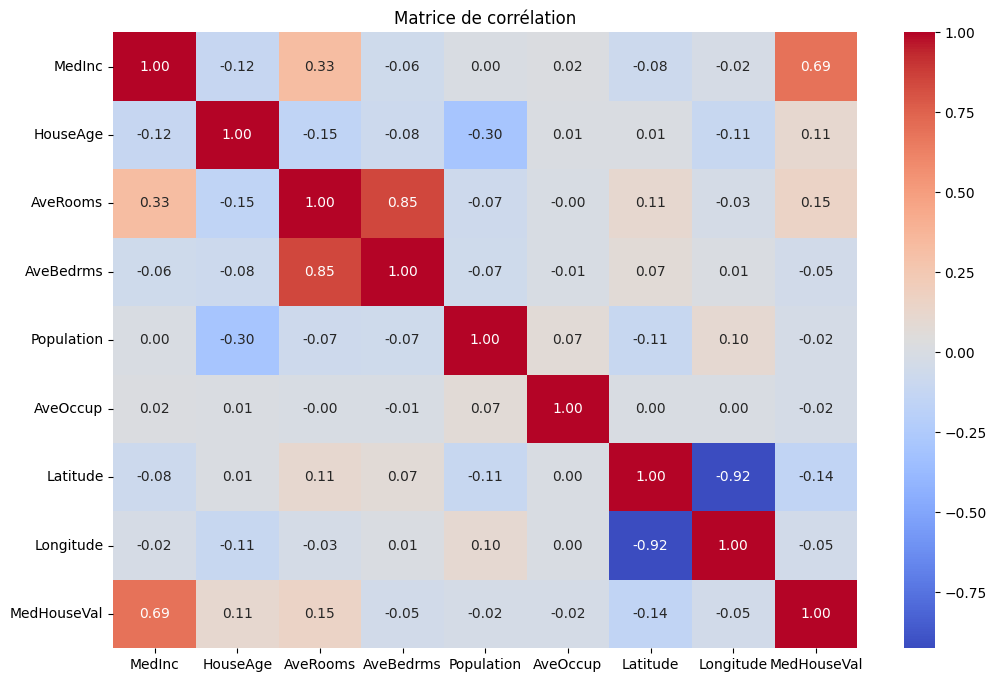

In [25]:
# Analyse exploratoire des données (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques de base
print(df.describe())

# Histogrammes pour toutes les colonnes
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogrammes des variables", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots pour détecter les outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots des variables")
plt.show()

# Scatter plots : prix médian vs quelques variables clés
plt.figure(figsize=(15, 5))

for i, col in enumerate(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(x=df[col], y=df['MedHouseVal'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
    plt.tight_layout()

plt.suptitle("Relation entre variables clés et MedHouseVal", fontsize=16, y=1.05)
plt.show()

# Matrice de corrélation
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [26]:
# Split des données en train / validation / test

from sklearn.model_selection import train_test_split

# Étape 1 : on sépare 20% pour le test
train_val, test = train_test_split(df, test_size=0.2, random_state=42)

# Étape 2 : on sépare ensuite 25% de train_val pour la validation
# (0.25 x 0.8 = 0.20 donc on aura 60% train, 20% val, 20% test)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)

# Vérification des tailles
print(f"Taille total : {len(df)}")
print(f"Train : {len(train)} ({len(train)/len(df)*100:.1f}%)")
print(f"Validation : {len(val)} ({len(val)/len(df)*100:.1f}%)")
print(f"Test : {len(test)} ({len(test)/len(df)*100:.1f}%)")


Taille total : 20640
Train : 12384 (60.0%)
Validation : 4128 (20.0%)
Test : 4128 (20.0%)


In [27]:
# Feature Engineering : normalisation

from sklearn.preprocessing import StandardScaler

# Séparation des features et de la cible
features = df.columns.drop('MedHouseVal')

X_train = train[features]
y_train = train['MedHouseVal']

X_val = val[features]
y_val = val['MedHouseVal']

X_test = test[features]
y_test = test['MedHouseVal']

# Normalisation des features (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Vérification rapide de la normalisation
import numpy as np

print("Moyenne des features normalisées (train) :", np.mean(X_train_scaled, axis=0))
print("Écart-type des features normalisées (train) :", np.std(X_train_scaled, axis=0))


Moyenne des features normalisées (train) : [-2.49011262e-16  1.23358114e-16 -2.81141748e-16 -2.28069071e-16
  5.39333149e-17 -1.54914841e-17  6.08184189e-16 -7.17083585e-15]
Écart-type des features normalisées (train) : [1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
# Régression linéaire de base

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Création du modèle
model = LinearRegression()

# Entraînement sur le jeu d'entraînement normalisé
model.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de validation
val_preds = model.predict(X_val_scaled)

# Évaluation sur validation
mse = mean_squared_error(y_val, val_preds)
mae = mean_absolute_error(y_val, val_preds)
r2 = r2_score(y_val, val_preds)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation MAE: {mae:.4f}")
print(f"Validation R²: {r2:.4f}")


Validation MSE: 0.5297
Validation MAE: 0.5333
Validation R²: 0.6142


In [29]:
# Régularisation : Ridge (L2) et Lasso (L1)

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modèles avec régularisation
ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000)

# Entraînement
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# Prédictions sur le set de validation
ridge_preds = ridge.predict(X_val_scaled)
lasso_preds = lasso.predict(X_val_scaled)

# Évaluation Ridge
ridge_mse = mean_squared_error(y_val, ridge_preds)
ridge_mae = mean_absolute_error(y_val, ridge_preds)
ridge_r2 = r2_score(y_val, ridge_preds)

# Évaluation Lasso
lasso_mse = mean_squared_error(y_val, lasso_preds)
lasso_mae = mean_absolute_error(y_val, lasso_preds)
lasso_r2 = r2_score(y_val, lasso_preds)

print("Ridge Regression (validation):")
print(f"  MSE: {ridge_mse:.4f}")
print(f"  MAE: {ridge_mae:.4f}")
print(f"  R²: {ridge_r2:.4f}\n")

print("Lasso Regression (validation):")
print(f"  MSE: {lasso_mse:.4f}")
print(f"  MAE: {lasso_mae:.4f}")
print(f"  R²: {lasso_r2:.4f}")


Ridge Regression (validation):
  MSE: 0.5297
  MAE: 0.5333
  R²: 0.6142

Lasso Regression (validation):
  MSE: 0.6825
  MAE: 0.6257
  R²: 0.5029


In [30]:
# Évaluation finale sur le test set

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supposons que Ridge soit le meilleur modèle sélectionné à l'étape précédente
best_model = ridge  # ou lasso selon vos résultats

# Prédictions sur le test set
test_preds = best_model.predict(X_test_scaled)

# Calcul des métriques
test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print("Évaluation finale sur le test set :")
print(f"  MSE : {test_mse:.4f}")
print(f"  MAE : {test_mae:.4f}")
print(f"  R²  : {test_r2:.4f}")

# Calcul d'un intervalle de confiance simple pour l'erreur moyenne
import numpy as np
from scipy import stats

errors = y_test - test_preds
mean_error = np.mean(errors)
std_error = np.std(errors)
n = len(errors)
confidence = 0.95
h = std_error / np.sqrt(n) * stats.t.ppf((1 + confidence) / 2, n - 1)

print(f"Intervalle de confiance à {confidence*100:.0f}% pour l'erreur moyenne : [{mean_error - h:.4f}, {mean_error + h:.4f}]")


Évaluation finale sur le test set :
  MSE : 0.5617
  MAE : 0.5333
  R²  : 0.5713
Intervalle de confiance à 95% pour l'erreur moyenne : [-0.0214, 0.0243]


Importance des variables (coefficients Ridge) :
MedInc        0.860209
AveBedrms     0.311844
HouseAge      0.120109
Population   -0.009540
AveOccup     -0.026170
AveRooms     -0.280228
Longitude    -0.860858
Latitude     -0.887173
dtype: float64


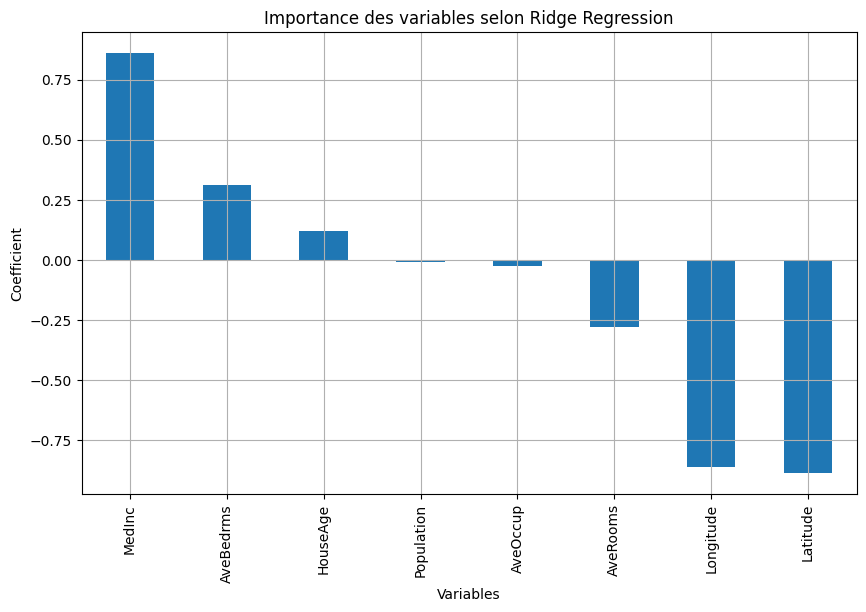


Pistes d'amélioration :
- Effectuer un tuning des hyperparamètres (GridSearchCV, RandomizedSearchCV).
- Tester des modèles non-linéaires : SVR, Random Forest, Gradient Boosting, etc.
- Ajouter des features dérivées, interactions ou transformations non-linéaires.
- Vérifier la robustesse avec une validation croisée.
- Analyser les résidus pour détecter d'éventuelles structures non modélisées.


In [31]:
# Conclusion et interprétation des résultats

import pandas as pd

# Affichage de l’importance des variables selon le modèle Ridge
coef = pd.Series(best_model.coef_, index=features)
coef_sorted = coef.sort_values(ascending=False)

print("Importance des variables (coefficients Ridge) :")
print(coef_sorted)

# Visualisation des coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
coef_sorted.plot(kind='bar')
plt.title("Importance des variables selon Ridge Regression")
plt.ylabel("Coefficient")
plt.xlabel("Variables")
plt.grid(True)
plt.show()

# Pistes d'amélioration possibles
print("\nPistes d'amélioration :")
print("- Effectuer un tuning des hyperparamètres (GridSearchCV, RandomizedSearchCV).")
print("- Tester des modèles non-linéaires : SVR, Random Forest, Gradient Boosting, etc.")
print("- Ajouter des features dérivées, interactions ou transformations non-linéaires.")
print("- Vérifier la robustesse avec une validation croisée.")
print("- Analyser les résidus pour détecter d'éventuelles structures non modélisées.")


Test MSE: 0.5617
Test MAE: 0.5333
Test R²: 0.5713


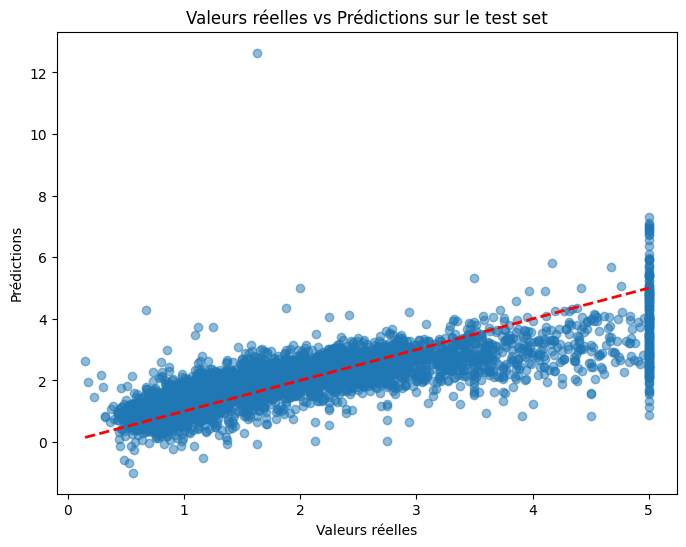

In [32]:
best_model = ridge
test_preds = best_model.predict(X_test_scaled)

# 4. Calcul des métriques
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

# 5. (Optionnel) Visualisation : valeurs réelles vs prédites
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, test_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs Prédictions sur le test set")
plt.show()
